In [1]:
#Importing the important modules
import shutil
import os
import numpy as np
import pandas as pd
import statistics as st # For statistical calculations.
import scipy.stats as scst
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
SubjectList = []
for i in range(1,9):
    SubjectList.append(f'Subject{i}')
Muscles = ['M1','M2','M3','M4','M5','M6','M7','M8']
MovementClasses = {'T_T':1,'I_I':2,'M_M':3,'R_R':4,'L_L':5,'T_I':6,'T_M':7,'T_R':8,'T_L':9,'I_M':10,'M_R':11,'R_L':12,'IMR':13,'MRL':14,'HC_':15}

In [10]:
path = os.getcwd()

In [11]:
SubjectsFilePaths = os.listdir()
NumOfSubjects = len(os.listdir())
SubjectsFilePaths

['.ipynb_checkpoints',
 'confusion_matrix.png',
 'confusion_matrix_percentage.png',
 'FeatureImportance.png',
 'FeatureImportancs.png',
 'S1-Delsys-15Class',
 'S2-Delsys-15Class',
 'S3-Delsys-15Class',
 'S4-Delsys-15Class',
 'S5-Delsys-15Class',
 'S6-Delsys-15Class',
 'S7-Delsys-15Class',
 'S8-Delsys-15Class']

In [12]:
files = os.listdir('./S1-Delsys-15Class/')
filenames = []
for f in files:
    filename = f.strip('.')[:-4]
    filenames.append(filename)
len(filenames)

45

In [13]:
#Creating a data frome dictionary of all files of all Subjects
def CreateDataframeDict(path):
    dataframedict = {}
    NumOfSubjects = 8
    for i in range(1,NumOfSubjects+1):
        for file in os.listdir(path + f'/S{i}-Delsys-15Class/'):
            var_name = file[:-4]
            dataframedict[f'S{i}'+var_name] = (pd.read_csv(f'./S{i}-Delsys-15Class/'+file,names=Muscles,nrows=40000))
    return dataframedict

In [14]:
SubjectTrialDict = CreateDataframeDict(path)

In [15]:
SubjectTrialDict.keys()

dict_keys(['S1HC_1', 'S1HC_2', 'S1HC_3', 'S1IMR1', 'S1IMR2', 'S1IMR3', 'S1I_I1', 'S1I_I2', 'S1I_I3', 'S1I_M1', 'S1I_M2', 'S1I_M3', 'S1L_L1', 'S1L_L2', 'S1L_L3', 'S1MRL1', 'S1MRL2', 'S1MRL3', 'S1M_M1', 'S1M_M2', 'S1M_M3', 'S1M_R1', 'S1M_R2', 'S1M_R3', 'S1R_L1', 'S1R_L2', 'S1R_L3', 'S1R_R1', 'S1R_R2', 'S1R_R3', 'S1T_I1', 'S1T_I2', 'S1T_I3', 'S1T_L1', 'S1T_L2', 'S1T_L3', 'S1T_M1', 'S1T_M2', 'S1T_M3', 'S1T_R1', 'S1T_R2', 'S1T_R3', 'S1T_T1', 'S1T_T2', 'S1T_T3', 'S2HC_1', 'S2HC_2', 'S2HC_3', 'S2IMR1', 'S2IMR2', 'S2IMR3', 'S2I_I1', 'S2I_I2', 'S2I_I3', 'S2I_M1', 'S2I_M2', 'S2I_M3', 'S2L_L1', 'S2L_L2', 'S2L_L3', 'S2MRL1', 'S2MRL2', 'S2MRL3', 'S2M_M1', 'S2M_M2', 'S2M_M3', 'S2M_R1', 'S2M_R2', 'S2M_R3', 'S2R_L1', 'S2R_L2', 'S2R_L3', 'S2R_R1', 'S2R_R2', 'S2R_R3', 'S2T_I1', 'S2T_I2', 'S2T_I3', 'S2T_L1', 'S2T_L2', 'S2T_L3', 'S2T_M1', 'S2T_M2', 'S2T_M3', 'S2T_R1', 'S2T_R2', 'S2T_R3', 'S2T_T1', 'S2T_T2', 'S2T_T3', 'S3HC_1', 'S3HC_2', 'S3HC_3', 'S3IMR1', 'S3IMR2', 'S3IMR3', 'S3I_I1', 'S3I_I2', 'S3I_I3',

In [16]:
h = SubjectTrialDict['S1HC_1']

In [17]:
h.shape

(40000, 8)

In [18]:
from scipy.fft import fft
from scipy.signal import welch

In [19]:
def extract_features(signal,fs = 4000):
    # Time Domain Features
    rms = np.sqrt(np.mean(signal**2))
    mav = np.mean(np.abs(signal))
    wl = np.sum(np.abs(np.diff(signal)))

    # Frequency Domain Features
    freqs, psd = welch(signal, fs=fs, nperseg=1024)
    mnf = np.sum(freqs * psd) / np.sum(psd)
    cumulative_sum = np.cumsum(psd)
    mdf = freqs[np.where(cumulative_sum >= cumulative_sum[-1] / 2)[0][0]]

    # Statistical Features
    skew = scst.skew(signal)
    kurt = scst.kurtosis(signal)

    return rms, mav, wl, mnf, mdf, skew, kurt

In [62]:
SubjectTrialDict['S1HC_1'].shape

(40000, 8)

In [20]:
feat = []
for i in range(SubjectTrialDict['S1HC_1'].shape[1]):
    muscle_data = SubjectTrialDict['S1HC_1'].iloc[:, i]
    feat.append(extract_features(muscle_data))

In [61]:
len(feat)

8

In [22]:
featureCol = ['RMS','MAV','WL','MnF','MedF','Skew','Kurt']
feature_matrix_S1HC1 = pd.DataFrame(feat, columns=featureCol,index=Muscles)

In [23]:
feature_matrix_S1HC1

,RMS,MAV,WL,MnF,MedF,Skew,Kurt
M1,0.000496,0.000363,2.825458,108.745083,82.03125,-0.507230,3.328739
M2,0.000275,0.000208,1.577894,101.411414,82.03125,-0.232099,1.477972
M3,0.000095,0.000072,0.678409,122.804061,97.65625,0.085067,1.183536
M4,0.000192,0.000137,0.997684,96.108328,82.03125,0.759377,3.816475
M5,0.000695,0.000511,3.943219,108.264834,89.84375,-0.377707,2.902550
M6,0.000441,0.000313,2.538971,110.450317,93.75000,-0.615495,4.422357
M7,0.001769,0.001299,11.918374,143.657432,121.09375,-0.618228,1.115376
M8,0.000929,0.000680,7.027085,143.013852,117.18750,-0.389537,2.195681


In [24]:
def extractfeatures(Dict):
    featuredict = {}
    for key in Dict.keys():
        featuredict[key] = []
        for i in range(Dict[key].shape[1]):
            muscle_data = Dict[key].iloc[:, i]
            featuredict[key].append(extract_features(muscle_data))

    return featuredict
            

In [25]:
features_eachsubject = extractfeatures(SubjectTrialDict)

In [33]:
A = np.array(features_eachsubject['S1HC_1']).reshape(1,-1)
A.shape
pd.DataFrame(A)

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,0.000496,0.000363,2.825458,108.745083,82.03125,-0.50723,3.328739,0.000275,0.000208,1.577894,...,121.09375,-0.618228,1.115376,0.000929,0.00068,7.027085,143.013852,117.1875,-0.389537,2.195681


In [34]:
len(features_eachsubject)

360

In [35]:
len(features_eachsubject['S1HC_1'])

8

In [36]:
flattened_data = {key: [elem for tup in value for elem in tup] for key, value in features_eachsubject.items()}

In [37]:
featurematrix = pd.DataFrame.from_dict(flattened_data, orient='index')

In [38]:
featurematrix

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
S1HC_1,0.000496,0.000363,2.825458,108.745083,82.03125,-0.507230,3.328739,0.000275,0.000208,1.577894,...,121.09375,-0.618228,1.115376,0.000929,0.000680,7.027085,143.013852,117.18750,-0.389537,2.195681
S1HC_2,0.000316,0.000206,1.749402,117.429771,85.93750,-1.378977,10.795033,0.000202,0.000151,1.122804,...,113.28125,-0.804492,2.779765,0.000638,0.000439,3.958055,123.571030,93.75000,-1.057220,5.481018
S1HC_3,0.000404,0.000282,2.483239,123.168934,93.75000,-1.089729,5.365156,0.000182,0.000139,1.055424,...,117.18750,-0.872355,2.962811,0.000645,0.000446,4.320544,136.558266,109.37500,-0.538729,5.274260
S1IMR1,0.000191,0.000148,1.067195,92.187760,70.31250,-0.211130,0.749802,0.000117,0.000092,0.750126,...,85.93750,-0.370218,0.618380,0.000195,0.000150,1.355586,117.796521,89.84375,-0.598835,1.370292
S1IMR2,0.000178,0.000136,0.915406,87.719640,66.40625,-0.128873,1.840578,0.000106,0.000084,0.628402,...,82.03125,-0.371371,1.271196,0.000172,0.000130,1.107477,111.388756,82.03125,-0.671163,2.211555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S8T_R2,0.000291,0.000223,1.642062,99.127991,85.93750,0.453830,1.086990,0.000172,0.000137,0.844821,...,54.68750,-0.525790,4.555730,0.000207,0.000173,0.869090,68.208325,50.78125,-0.047038,-0.464342
S8T_R3,0.000211,0.000160,1.232530,103.025632,89.84375,0.373319,1.051002,0.000149,0.000121,0.697220,...,50.78125,-0.165460,-0.018621,0.000183,0.000158,0.725264,63.640626,50.78125,-0.019724,-1.023547
S8T_T1,0.000922,0.000712,7.685831,149.126840,117.18750,-0.430811,1.024245,0.000390,0.000304,2.379953,...,78.12500,-0.420126,0.995501,0.000339,0.000279,1.835554,86.976912,50.78125,-0.089269,-0.262146
S8T_T2,0.000693,0.000528,5.567271,145.714969,113.28125,-0.451858,1.350761,0.000341,0.000264,2.004740,...,78.12500,-0.400243,0.962847,0.000288,0.000241,1.449402,80.126131,50.78125,0.031433,-0.588639


In [39]:
featureColnames = []
for i in range(len(Muscles)):
    for j in range(len(featureCol)):
        featureColnames.append(Muscles[i] + '_' + featureCol[j])


In [40]:
featurematrix.columns = featureColnames

In [41]:
Target_Classes = []
for key in features_eachsubject.keys():
    if key[2:5] in MovementClasses.keys():
        Target_Classes.append(MovementClasses[key[2:5]])

In [42]:
featurematrix['Targets'] = Target_Classes

In [43]:
featurematrix

,M1_RMS,M1_MAV,M1_WL,M1_MnF,M1_MedF,M1_Skew,M1_Kurt,M2_RMS,M2_MAV,M2_WL,...,M7_Skew,M7_Kurt,M8_RMS,M8_MAV,M8_WL,M8_MnF,M8_MedF,M8_Skew,M8_Kurt,Targets
S1HC_1,0.000496,0.000363,2.825458,108.745083,82.03125,-0.507230,3.328739,0.000275,0.000208,1.577894,...,-0.618228,1.115376,0.000929,0.000680,7.027085,143.013852,117.18750,-0.389537,2.195681,15
S1HC_2,0.000316,0.000206,1.749402,117.429771,85.93750,-1.378977,10.795033,0.000202,0.000151,1.122804,...,-0.804492,2.779765,0.000638,0.000439,3.958055,123.571030,93.75000,-1.057220,5.481018,15
S1HC_3,0.000404,0.000282,2.483239,123.168934,93.75000,-1.089729,5.365156,0.000182,0.000139,1.055424,...,-0.872355,2.962811,0.000645,0.000446,4.320544,136.558266,109.37500,-0.538729,5.274260,15
S1IMR1,0.000191,0.000148,1.067195,92.187760,70.31250,-0.211130,0.749802,0.000117,0.000092,0.750126,...,-0.370218,0.618380,0.000195,0.000150,1.355586,117.796521,89.84375,-0.598835,1.370292,13
S1IMR2,0.000178,0.000136,0.915406,87.719640,66.40625,-0.128873,1.840578,0.000106,0.000084,0.628402,...,-0.371371,1.271196,0.000172,0.000130,1.107477,111.388756,82.03125,-0.671163,2.211555,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S8T_R2,0.000291,0.000223,1.642062,99.127991,85.93750,0.453830,1.086990,0.000172,0.000137,0.844821,...,-0.525790,4.555730,0.000207,0.000173,0.869090,68.208325,50.78125,-0.047038,-0.464342,8
S8T_R3,0.000211,0.000160,1.232530,103.025632,89.84375,0.373319,1.051002,0.000149,0.000121,0.697220,...,-0.165460,-0.018621,0.000183,0.000158,0.725264,63.640626,50.78125,-0.019724,-1.023547,8
S8T_T1,0.000922,0.000712,7.685831,149.126840,117.18750,-0.430811,1.024245,0.000390,0.000304,2.379953,...,-0.420126,0.995501,0.000339,0.000279,1.835554,86.976912,50.78125,-0.089269,-0.262146,1
S8T_T2,0.000693,0.000528,5.567271,145.714969,113.28125,-0.451858,1.350761,0.000341,0.000264,2.004740,...,-0.400243,0.962847,0.000288,0.000241,1.449402,80.126131,50.78125,0.031433,-0.588639,1


In [44]:
featurematrix.to_csv(r'C:\\Users\\harsh\\FeatureMat.csv', index=True)

In [45]:
featurematrix[0:1]

,M1_RMS,M1_MAV,M1_WL,M1_MnF,M1_MedF,M1_Skew,M1_Kurt,M2_RMS,M2_MAV,M2_WL,...,M7_Skew,M7_Kurt,M8_RMS,M8_MAV,M8_WL,M8_MnF,M8_MedF,M8_Skew,M8_Kurt,Targets
S1HC_1,0.000496,0.000363,2.825458,108.745083,82.03125,-0.50723,3.328739,0.000275,0.000208,1.577894,...,-0.618228,1.115376,0.000929,0.00068,7.027085,143.013852,117.1875,-0.389537,2.195681,15


In [46]:
X = featurematrix.iloc[:, :-1]  
y = featurematrix.iloc[:, -1] 

In [55]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [56]:
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df

,precision,recall,f1-score,support
1,0.857143,0.857143,0.857143,7.000000
2,0.833333,0.714286,0.769231,7.000000
3,0.875000,1.000000,0.933333,7.000000
4,0.875000,0.875000,0.875000,8.000000
5,0.666667,0.857143,0.750000,7.000000
6,1.000000,1.000000,1.000000,7.000000
7,1.000000,0.750000,0.857143,8.000000
8,1.000000,0.857143,0.923077,7.000000
9,0.700000,1.000000,0.823529,7.000000
10,0.625000,0.714286,0.666667,7.000000


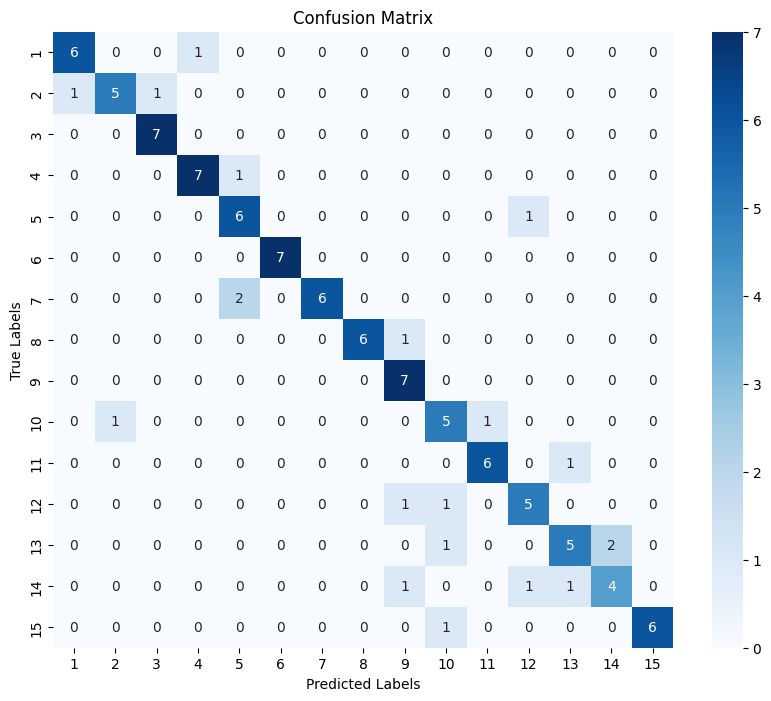

In [57]:
# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.savefig("confusion_matrix.png", dpi=300,bbox_inches='tight' )
plt.show()